In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, normalize

# Loading data

In [2]:
x = pd.read_csv('./Sensor-logger-dataset/Accel-x-10.2s.csv')
y = pd.read_csv('./Sensor-logger-dataset/accel-y-10.5s.csv')
z = pd.read_csv('./Sensor-logger-dataset/accel-z-11.2s.csv')
x
frames = [x, y, z]
#combine 3 different frames into 1 frame
frames = pd.concat(frames)
print(frames.shape)
frame_dropped = frames.drop(['time', 'seconds_elapsed'], axis=1)
print(frame_dropped.shape)

(1607, 5)
(1607, 3)


# Preprocessing data (To be done later)

# Plot Dendrogram

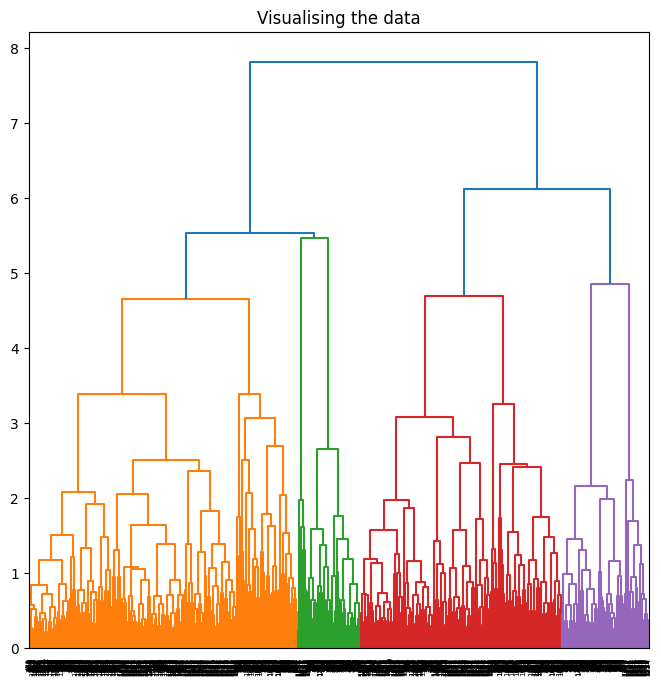

In [4]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
#use complete for linkage method since it shows the distributed result
linkage_method = sch.linkage(frame_standard, method='complete', metric='euclidean')

dendrogram = sch.dendrogram(linkage_method)
plt.show()
##the longer the vertical branch, the longer the distance between two clusters

In [5]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(frame_normalized)
# labels = model.labels_
labels = model.fit_predict(frame_normalized)
print(labels)

[1 1 1 ... 0 1 1]


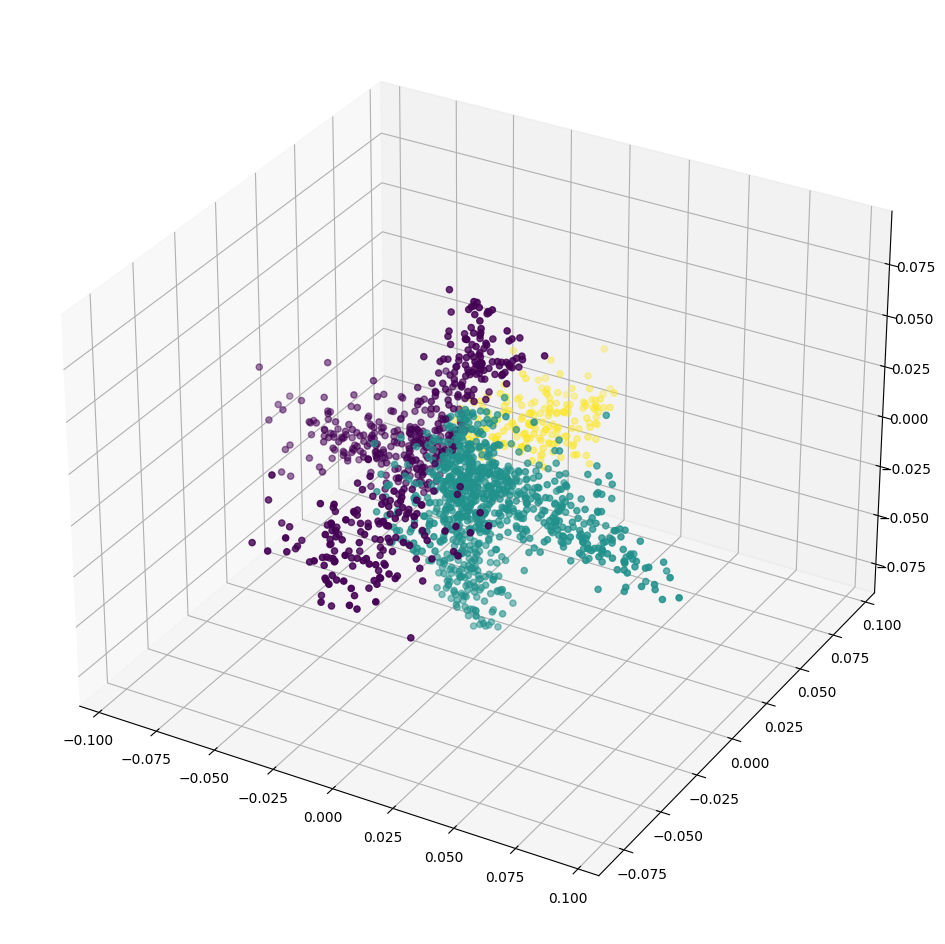

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

x_vals = frame_normalized[:,0]
y_vals = frame_normalized[:,1]
z_vals = frame_normalized[:,2]

ax.scatter(x_vals, y_vals, z_vals, c=labels)
plt.show()